### Загрузка изображений из интернета

Шаг 1: понять, как выглядят ссылки на картинках на нужных вам страницах (вручную или с помощью специальных библиотек).

Шаг 2: сохранить картинку (учитывая правило относительных силок).

In [180]:
import requests
from bs4 import BeautifulSoup

url = "http://craphound.com/images/1006884_2adf8fc7.jpg"
response = requests.get(url)
if response.status_code == 200:
    with open("new_sample.jpg", 'wb') as f:
        f.write(response.content)

In [181]:
url = 'http://kuking.net/10_409.htm'

In [182]:
url = "http://kuking.net/" + "pictures/10_409_step1.jpg"

In [183]:
response = requests.get(url)
if response.status_code == 200:
    with open("other_sample.jpg", 'wb') as f:
        f.write(response.content)

In [184]:
url = 'http://kuking.net/10_409.htm'

In [185]:
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [187]:
soup.findAll('img')[:10]

[<img alt="КАК СДЕЛАТЬ МАРМЕЛАД" itemprop="image" src="/resize/197/295/w/pictures/noimage/nf-photo.png"/>,
 <img align="left" alt="Photo" border="0" height="150" hspace="10" src="pictures/10_409_step1.jpg" vspace="0" width="150"/>,
 <img align="left" alt="Photo" border="0" height="150" hspace="10" src="pictures/10_409_step2.jpg" vspace="0" width="150"/>,
 <img align="left" alt="Photo" border="0" height="150" hspace="10" src="pictures/10_409_step3.jpg" vspace="0" width="150"/>,
 <img align="left" alt="Photo" border="0" height="150" hspace="10" src="pictures/10_409_step4.jpg" vspace="0" width="150"/>,
 <img align="left" alt="Photo" border="0" height="150" hspace="10" src="pictures/10_409_step5.jpg" vspace="0" width="150"/>,
 <img align="left" alt="Photo" border="0" height="150" hspace="10" src="pictures/10_409_step7.jpg" vspace="0" width="150"/>,
 <img align="left" alt="Photo" border="0" height="150" hspace="10" src="pictures/10_409_step8.jpg" vspace="0" width="150"/>,
 <img align="left"

## Cнова про анализ данных

In [189]:
import pandas as pd

In [190]:
df = pd.read_csv('titanic_data.csv')
surv_df = pd.read_csv('titanic_surv.csv')
swimmers_df = pd.read_csv('swimmers_df.csv')

In [191]:
df = df.join(surv_df)

In [192]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [193]:
swimmers_df.head()

,Unnamed: 0,Name,Attended_swimmers_school
0,0,"Braund, Mr. Owen Harris",0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,2,"Heikkinen, Miss. Laina",0
3,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,4,"Allen, Mr. William Henry",0


In [194]:
rich_df = pd.merge(df, swimmers_df, on = 'Name')#left_on='Name', right_on = 'Name')

In [195]:
rich_df['relatives'] = rich_df['SibSp'] + rich_df['Parch']
rich_df['is_travels_alone'] = list(map(lambda x: x == 0, rich_df['relatives']))

## Теперь будем рисовать картинки

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Встроенные функции pandas:

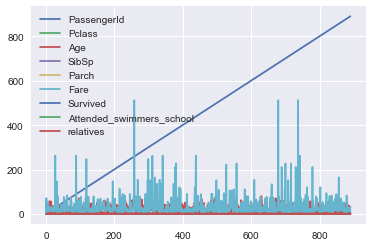

In [165]:
rich_df.plot()

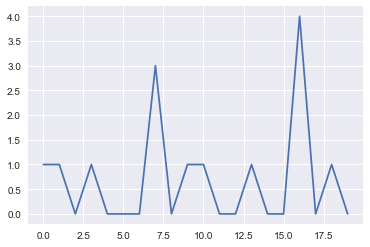

In [166]:
rich_df['SibSp'].head(20).plot()

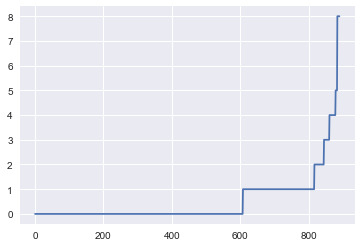

In [59]:
pd.Series(sorted(rich_df['SibSp'])).plot()

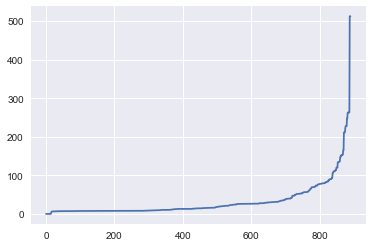

In [60]:
pd.Series(sorted(rich_df['Fare'])).plot()

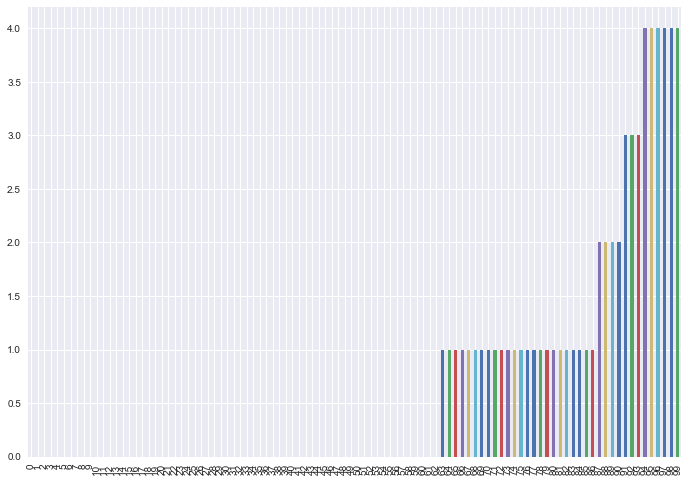

In [70]:
pd.Series(sorted(rich_df['SibSp'].sample(100))).plot.bar()

## matplotlib - ветеран визуализации

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

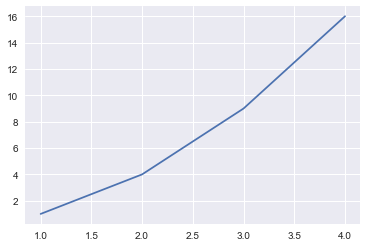

In [72]:
plt.plot([1,2,3,4], [1,4,9,16])
plt.show()

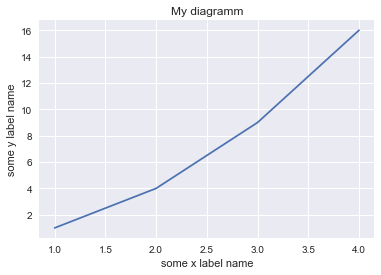

In [73]:
plt.plot([1,2,3,4], [1,4,9,16])
plt.xlabel('some x label name')
plt.ylabel('some y label name')
plt.title('My diagramm')
plt.show()

In [95]:
x = list(range(-100,100))
y = list(map(lambda t: t**2, x))

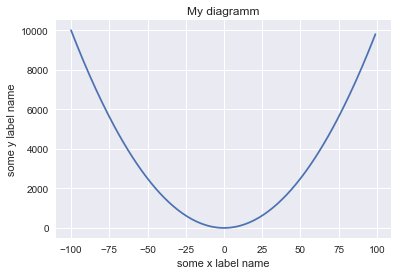

In [96]:
plt.plot(x,y)
plt.xlabel('some x label name')
plt.ylabel('some y label name')
plt.title('My diagramm')
plt.show()

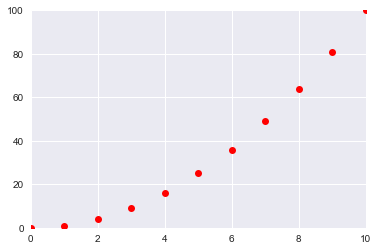

In [100]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'ro')
plt.axis([0, 10, 0, 100])
plt.show()

In [101]:
import numpy as np
t = np.arange(0., 5., 0.2)

In [102]:
t

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8])

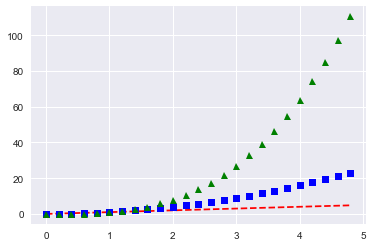

In [103]:
import numpy as np
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

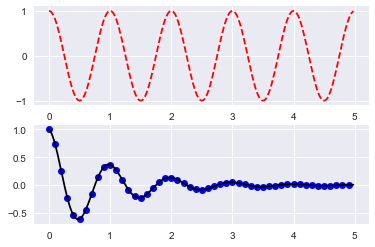

In [111]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(212)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(211)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

Угадай параметр:

In [112]:
titanic_df = rich_df

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


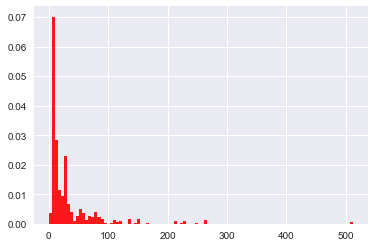

In [113]:
plt.hist(titanic_df['Fare'], bins=100, normed = 1, facecolor='r', alpha=0.9)
plt.show()

matplotlib - инженерная библиотека с интерфейсом 2000; это очень мощный иструмент, однако, многие задачи в нем решаются сложно и графики не такие красивые, как они могли бы быть. На основании нее написано очень много других библиотек.

In [114]:
titanic_df = rich_df

## Как я провел лето, или библиотека seaborn

In [130]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [116]:
import pandas as pd
titanic_df = pd.read_csv('titanic_data.csv')

In [117]:
titanic_df.columns
surv = pd.read_csv('titanic_surv.csv')

In [118]:
titanic_df = titanic_df.join(surv)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


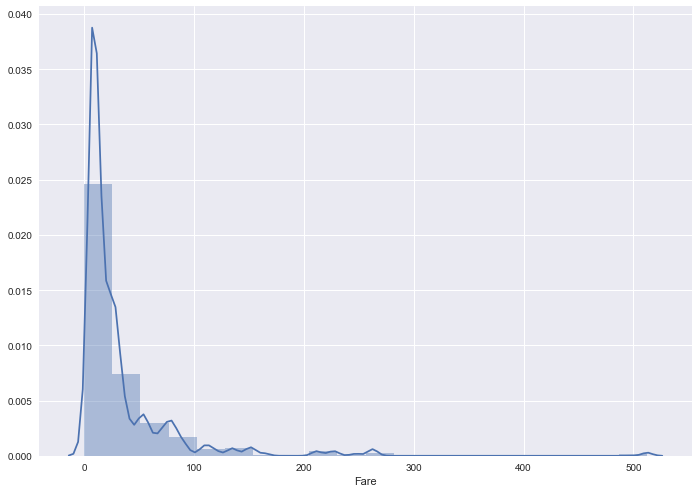

In [120]:
sns.distplot(titanic_df['Fare'], bins=20)

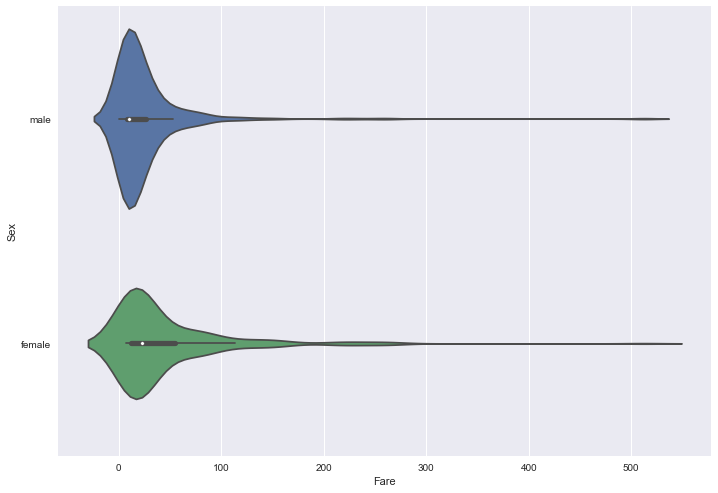

In [131]:
sns.violinplot(x='Fare', y = 'Sex', data = titanic_df)

In [98]:
rich_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived',
       'Attended_swimmers_school', 'relatives', 'is_travels_alone'],
      dtype='object')

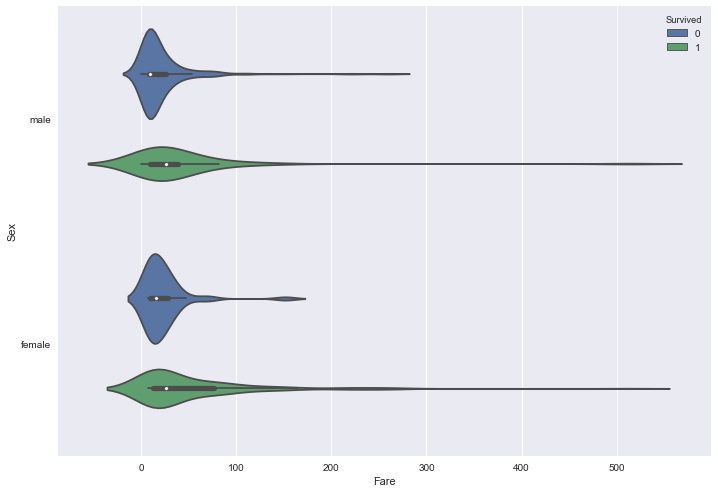

In [132]:
sns.violinplot(x='Fare', y = 'Sex', data = titanic_df, hue='Survived')#, split=True)

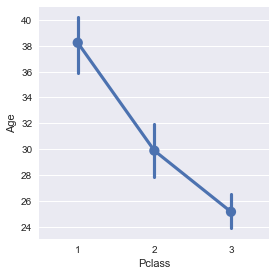

In [133]:
sns.factorplot(x = 'Pclass', y = 'Age', data = rich_df)

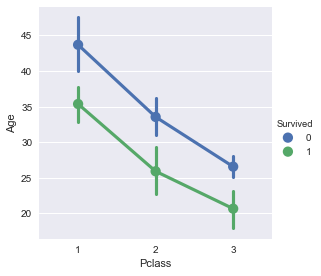

In [137]:
sns.factorplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = rich_df)

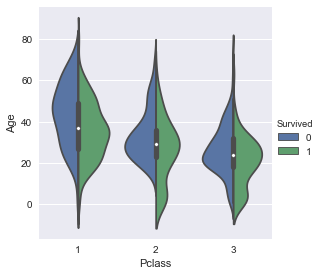

In [138]:
sns.factorplot(x = 'Pclass', y = 'Age', data = rich_df, kind='violin', hue = 'Survived', split=True) #, hue='Sex')

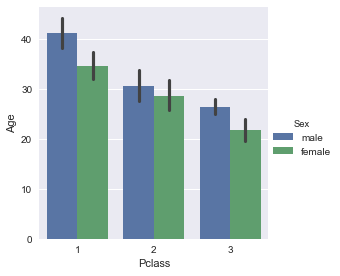

In [139]:
sns.factorplot(x = 'Pclass', y = 'Age', data = rich_df, kind='bar', hue='Sex')

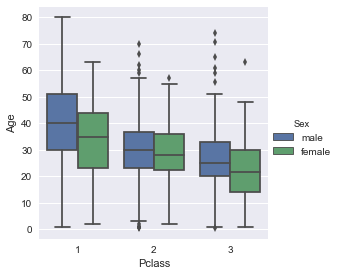

In [140]:
sns.factorplot(x = 'Pclass', y = 'Age', data = rich_df, kind='box', hue='Sex')

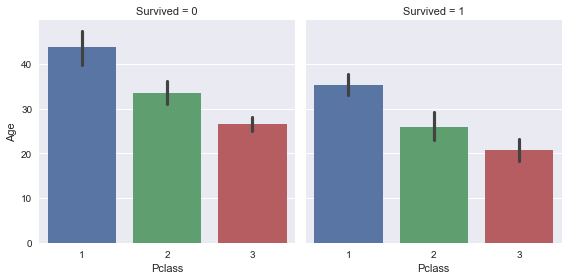

In [104]:
g = sns.factorplot(x = 'Pclass', y = 'Age', data = rich_df, kind='bar', col="Survived") #row

In [105]:
import pandas as pd

In [9]:
df = pd.read_excel('/Users/denikekate/Desktop/neiss2017_1000sample.xlsx')

## Домашнее задание

1. Свободный полет (от 1 до 8 баллов)

У вас есть файл электонной системы учета несмертельных травм, происходяших в США. (Так как весь файл очень большой, для подсчета вы можете использовать сэмпл за произвольный месяц или сэмпл с первой 1000 образцов (neiss2017_1000sample.xlsx)). Ваша задача исследовать эти данные всеми доступными вами способами и визуализировать ваше исследование за счет графиков (не менее 3 картинок). Результат должен выглядеть как отчет в juputer-notebook, сделайте его читаемым, пользуясь текстовыми блоками. Домашнее задание будет оцениваться баллами от 1 до  6 баллов, в зависимости от продуманности отчета.

Далее идет описание организации и ее деятельности (похоже их сайт заблокирован в России, поэтому копирую сюда, но описание носит скорей энциклопедическую ценность).

National Electronic Injury Surveillance System

For more than 45 years, the CPSC has operated a statistically valid injury surveillance and follow-back system known as the National Electronic Injury Surveillance System (NEISS). The primary purpose of NEISS is to collect data on consumer product-related injuries occurring in the United States. This data is what CPSC uses to produce nationwide estimates of product-related injuries.

Since the year 2000, when CPSC initiated an expansion of the system to collect data on all injuries, NEISS has become an important public health research tool, not just for CPSC, but for researchers and consumers throughout the United States and around the world.

2. Краулер изображений (5 баллов)
На страничке постеров к Звездным войнам скачайте каждый из постеров: https://www.kinopoisk.ru/film/zvyozdnye-voyny-poslednie-dzhedai-2017-718223/posters/ . Воспользуйтесь requests и beatiful soup.